Finite Difference Method

In [208]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output
import time

In [209]:
'''NOTES
 I don't super trust my matrix math, i'll show my equations once we're in class. But at the very least it 
 provides halfway(?) expected results. The alpha, beta, A are just constants I gathered up during the algebra.
 Similar with K and G, they just are V dependent so they're lambda functions.

 Also hbar and m are just totally felt by heart and soul, this doesn't really represent anything lmao
'''



i = np.imag(1j)
hbar = 2

m = 2

x = np.linspace(-1,1,100)
dx = x[1]-x[0]

t = np.linspace(0,20,1000)
dt = t[1]-t[0]


alpha = (i*dt)/(2*hbar)
beta = hbar/(2*m)


A = (alpha * beta) / dx**2

print(dt/dx**2)



49.054054054053964


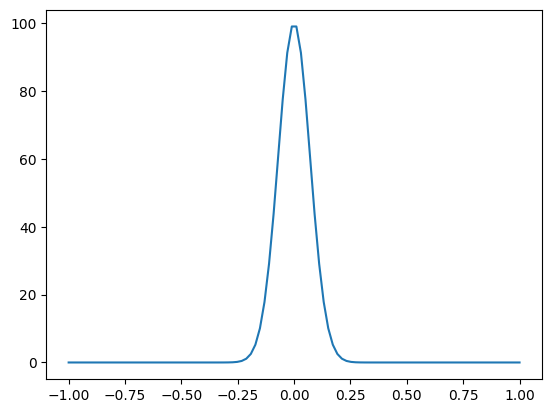

In [210]:


V = 1e2 * np.exp(-(x ** 2) * 100)
# V = np.zeros((len(x)))
# V[10:30] = 5
# V[-30:-10] = 5

plt.plot(x,V)


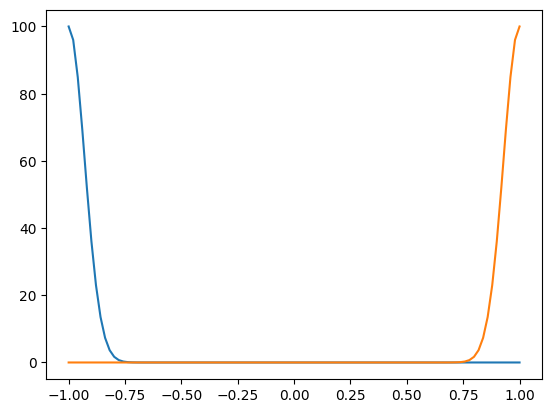

In [211]:
Vt = lambda ti: 1e2 * np.exp(-((x-1+2*ti*1/(len(t)))**2)*100) 
plt.plot(x,Vt(1000))
plt.plot(x,Vt(0))

0.9999952333991488


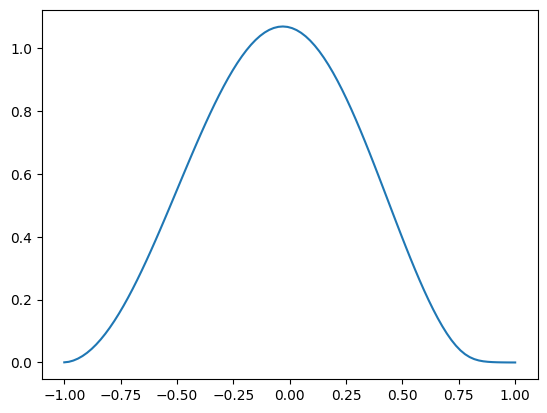

In [212]:

# K =lambda x : (1 + 2*A + V[x] * alpha) / A
# G = lambda x : (1 - 2*A - V[x] * alpha) / A

Kt = lambda x,ti : (1 + 2*A + Vt(ti)[x] * alpha) / A
Gt = lambda x,ti : (1 - 2*A - Vt(ti)[x] * alpha) / A

psi0 = np.exp(-(x**2)*100)

def MBarrs(solutions,t=None):
    diag_count = 0

    M = np.zeros((len(x),len(x)))
    B = np.zeros((len(x),))
    for i in range(len(x)):
        for j in range(len(x)):
            
            

            if i == j:
                # M[i,j] = K (i)
                M[i,j] = Kt (i,t)
                diag_count += 1

            elif (i == diag_count - 1) and (j == diag_count):
                M[i, j] = -1

            elif (i == diag_count) and j == (diag_count - 1):
                M[i, j] = -1
        
        if i > 1 and i < len(x) - 1:
            # B[i] = solutions[i] * G(i) + solutions[i+1] + solutions[i-1]
            B[i] = solutions[i] * Gt(i,t) + solutions[i+1] + solutions[i-1]
        elif i == 0:
            B[i] = 0 #solutions[i] * G(i) + solutions[i+1]
        elif i == len(x):
            B[i] = 0 #solutions[i] * G(i) + solutions[i-1]
    return(M,B)

M1,B1 = MBarrs(psi0,0)

V_overtime = np.empty((len(t),len(x)))

sols = np.linalg.solve(M1,B1)
solution_matrix = np.empty((len(t),len(x)))
for i in range(len(t)):
    Mx,Bx = MBarrs(sols,i)
    sols = np.linalg.solve(Mx,Bx)
    sols = sols / np.sqrt(np.sum(sols**2 * dx))
    solution_matrix[i] = sols
    V_overtime[i] = Vt(i)
    

#Psi_squared = np.absolute(sols/np.sqrt(np.sum(sols**2)))**2
plt.plot(x,np.absolute(solution_matrix[50])**2)

print(np.trapz(np.absolute(solution_matrix[50])**2,x))

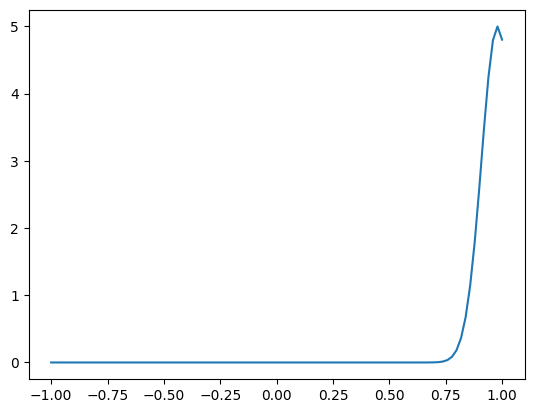

In [219]:
plt.plot(x,V_overtime[10] * 1/20)

MovieWriter Pillow unavailable; using Pillow instead.


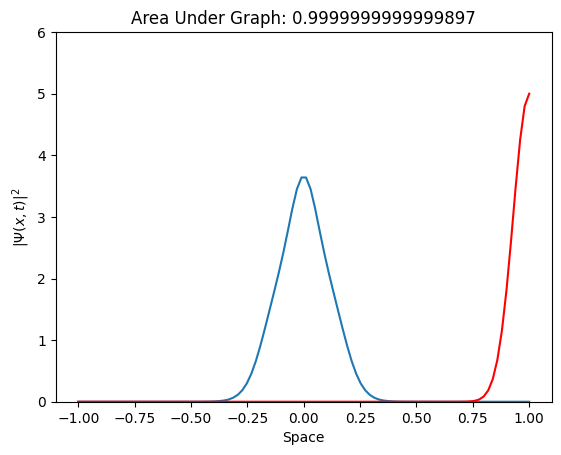

In [220]:

fig, ax = plt.subplots()


def update(frame):
    ax.clear()
    ax.plot(x, np.absolute(solution_matrix[frame, :])**2) 
    ax.plot(x,V_overtime[frame,:] * 1/20,'r-')
    # plotting magnitude of wave function squared
    #ax.plot(domain_x, np.absolute(true_solution_matrix[frame, :])**2)
    area = np.trapz(np.absolute(solution_matrix[frame,:])**2,x)
    ax.set_title(f'Area Under Graph: {area}')
    ax.set_xlabel('Space')
    ax.set_ylabel(r"$|\Psi(x,t)|^2$")
    ax.set_ylim(0,6)



# Create the animation
num_frames = solution_matrix.shape[0]

animation = FuncAnimation(fig, update, frames=num_frames, interval=30)


animation.save("output.gif",writer = "Pillow")
# Display the animation



In [214]:
# for i in range(len(t)):
#     plt.plot(x,np.absolute(solution_matrix[i])**2)
#     plt.show()
#     time.sleep(0.55)
#     clear_output()
    